<a href="https://colab.research.google.com/github/dzulfqr/testing/blob/master/PYIM_Assgn_1_8_Dzulfiqar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Dataset

Sebelum load csv menjadi dataframe, dibutuhkan kode untuk mengunggah csv tersebut ke google colab. Sehingga, kita menggunakan 'files' dari module google.colab

In [1]:
from google.colab import files
student_por = files.upload()

Saving student-por.csv to student-por.csv


Kemudian, load csv menjadi dataframe dengan menggunakan library pandas dan io.

In [33]:
import pandas as pd
import io
df_student_por = pd.read_csv(io.BytesIO(student_por['student-por.csv']))

Import pula libraries yang dibutuhkan dalam prediksi konsumsi alkohol siswa menggunakan Tensorflow.

In [34]:
# mlp for multiclass classification
from numpy import argmax
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

Melakukan subset untuk mengambil hanya kolom yang dibutuhkan dalam pembuatan model DNN.

In [35]:
_col = ['Dalc', 'Walc', 'absence',
        'age', 'goout', 'studytime']
list_df = [x for x in df_student_por if x in _col]

Mendefinisikan kolom-kolom yang merupakan category yang akan dilakukan encoding sehingga dapat menjadi input untuk pembuatan model DNN. Encoding kemudian dilakukan dengan menggunakan pandas (fungsi get_dummies).

In [36]:
excl_col_por = ['age', 'failures', 'absences', 'G1', 'G2', 'G3', 'Dalc', 'Walc']

In [37]:
cat_col_por = [x for x in list_df if x not in excl_col_por]
cat_col_por

['studytime', 'goout']

In [38]:
encoded_por = pd.get_dummies(df_student_por[list_df], columns=cat_col_por)
len(encoded_por)

649

In [39]:
encoded_por

,age,Dalc,Walc,studytime_1,studytime_2,studytime_3,studytime_4,goout_1,goout_2,goout_3,goout_4,goout_5
0,18,1,1,0,1,0,0,0,0,0,1,0
1,17,1,1,0,1,0,0,0,0,1,0,0
2,15,2,3,0,1,0,0,0,1,0,0,0
3,15,1,1,0,0,1,0,0,1,0,0,0
4,16,1,2,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,1,2,0,0,1,0,0,1,0,0,0
645,18,1,1,0,1,0,0,0,0,0,1,0
646,18,1,1,0,1,0,0,1,0,0,0,0
647,17,3,4,1,0,0,0,0,0,0,0,1


In [40]:
cols = encoded_por.columns.tolist()
cols.remove('Dalc')

In [41]:
cols.append('Dalc')
cols

['age',
 'Walc',
 'studytime_1',
 'studytime_2',
 'studytime_3',
 'studytime_4',
 'goout_1',
 'goout_2',
 'goout_3',
 'goout_4',
 'goout_5',
 'Dalc']

In [42]:
encoded_por = encoded_por[cols]
encoded_por

,age,Walc,studytime_1,studytime_2,studytime_3,studytime_4,goout_1,goout_2,goout_3,goout_4,goout_5,Dalc
0,18,1,0,1,0,0,0,0,0,1,0,1
1,17,1,0,1,0,0,0,0,1,0,0,1
2,15,3,0,1,0,0,0,1,0,0,0,2
3,15,1,0,0,1,0,0,1,0,0,0,1
4,16,2,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,0,0,1,0,0,1,0,0,0,1
645,18,1,0,1,0,0,0,0,0,1,0,1
646,18,1,0,1,0,0,1,0,0,0,0,1
647,17,4,1,0,0,0,0,0,0,0,1,3


Memisahkan features (X) dan label (y) dari dataset.

In [43]:
# split into input and output columns
X, y = encoded_por.values[:, :-1], encoded_por.values[:, -1]
X

array([[18,  1,  0, ...,  0,  1,  0],
       [17,  1,  0, ...,  1,  0,  0],
       [15,  3,  0, ...,  0,  0,  0],
       ...,
       [18,  1,  0, ...,  0,  0,  0],
       [17,  4,  1, ...,  0,  0,  1],
       [18,  4,  1, ...,  0,  0,  0]])

Normalisasi features yang digunakan.
Ini adalah praktik yang baik untuk menormalkan fitur yang menggunakan skala dan rentang yang berbeda.
Salah satu alasan mengapa ini penting adalah karena fitur dikalikan dengan bobot model. Jadi skala output dan skala gradien dipengaruhi oleh skala input.
Meskipun model mungkin bisa konvergen tanpa normalisasi fitur, normalisasi membuat training jauh lebih stabil.

In [44]:
from tensorflow.keras.layers.experimental import preprocessing
import numpy as np
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(X))

Melakukan separasi data training dan test, pendefinisian model DNN, hingga bisa fitting dan evaluasi.

In [51]:
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# determine the number of input features
n_features = X_train.shape[1]
# define model
model = Sequential()
model.add(normalizer)
model.add(Dense(512, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(5, activation='softmax'))
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

(519, 11) (130, 11) (519,) (130,)
Test Accuracy: 0.700


In [46]:
y_test.shape

(130,)

In [47]:
test_predictions = model.predict(X_test)
test_predictions.shape

(130, 5)

Karena hasil prediksi berupa array probabilitas setiap class 1/2/3/4/5, dibuat output baru yang berupa nama class nya.

In [48]:
import numpy as np
result = np.argmax(test_predictions, axis=1)

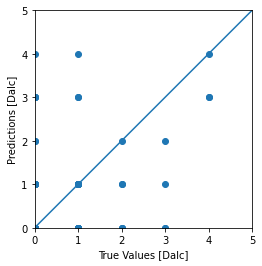

In [49]:
import matplotlib.pyplot as plt
test_predictions = model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, result)
plt.xlabel('True Values [Dalc]')
plt.ylabel('Predictions [Dalc]')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

Simpan model yang sudah dibuat. Diperoleh akurasi sebesar 70% meskipun pada grafik masih terlihat beberapa misclassification.

In [50]:
!mkdir -p saved_model
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model/assets
